In [63]:
from scipy.signal import fftconvolve, convolve2d
from astropy.io import fits
import PIL.Image
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import skew, kurtosis
%matplotlib inline

In [64]:
simulation = "/scratch/datasets/kat7_2000/"
neural_output = "/home/gijs/Work/vacuum-cleaner/test/rewrite/fits/"
#simulation = "/scratch/datasets/kat7_hdr/"
#neural_output = "/home/gijs/Work/vacuum-cleaner/test/kat7_simulated_hdr/fits/"

In [65]:
std_wsclean = []
std_neural = []
start = 1800
end = 1900

In [66]:
def render(a, imgdata, title):
    i = a.pcolor(imgdata, cmap='cubehelix')
    f.colorbar(i, ax=a)
    a.set_title(title)
    
def open_fits(x):
    return fits.open(x)[0].data.squeeze()

In [67]:
for number in range(start, end):
    neural_residual_path = "{}{}-residuals.fits".format(neural_output, number)
    residual_path = "{}{}-wsclean-residual.fits".format(simulation, number)
    residual_neural = open_fits(residual_path)
    residual_wsclean = open_fits(neural_residual_path)
    std_wsclean.append(np.std(residual_wsclean))
    std_neural.append(np.std(residual_neural))

In [68]:
m = max(std_wsclean + std_neural)

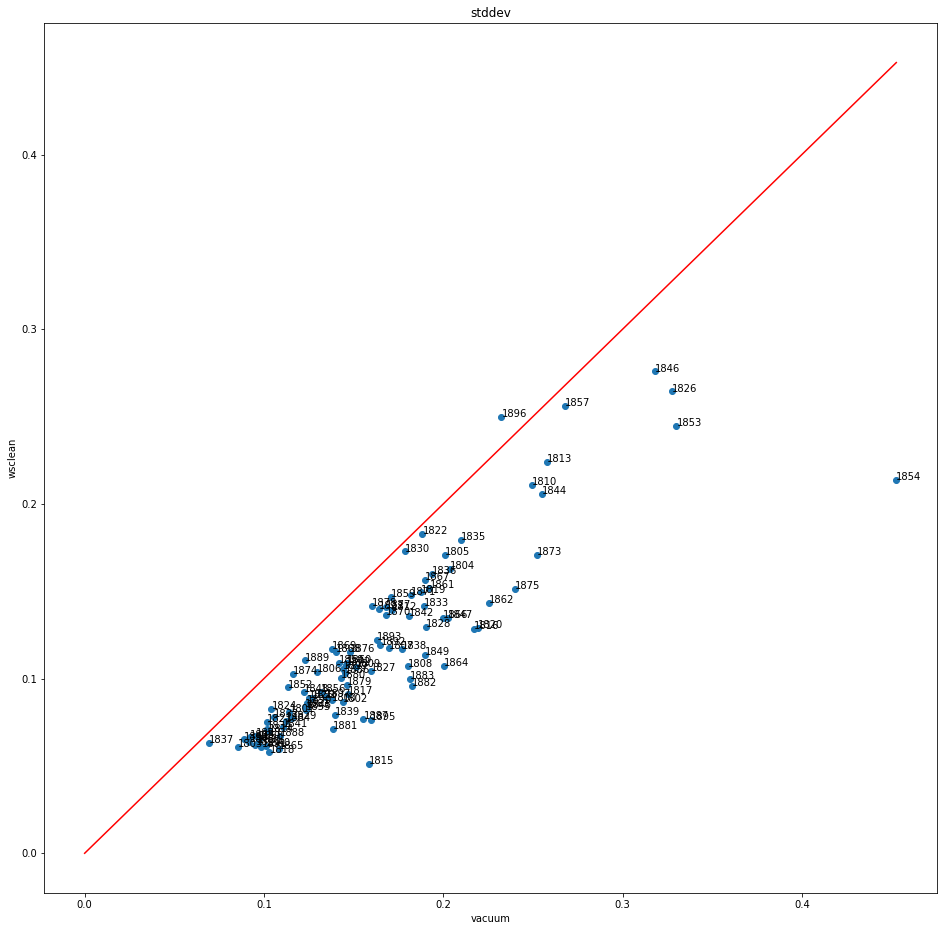

In [69]:
f, (a1) = plt.subplots(1, 1, figsize=(16,16))
a1.plot(std_wsclean, std_neural, 'o')
a1.plot([0, m], [0, m], 'r-')
a1.set_xlabel('vacuum')
a1.set_ylabel('wsclean')
a1.set_title('stddev')
#a1.set_aspect('equal')
for i, txt in enumerate(range(start, end)):
    a1.annotate(txt, (std_wsclean[i],std_neural[i]))

In [70]:
number = 1854
neural_residual = fits.open("{}{}-residuals.fits".format(neural_output, number))[0].data.squeeze()
residual = fits.open("{}{}-wsclean-residual.fits".format(simulation, number))[0].data.squeeze()

In [71]:
np.std(neural_residual)

0.4526355

In [72]:
np.std(residual)

0.21374837

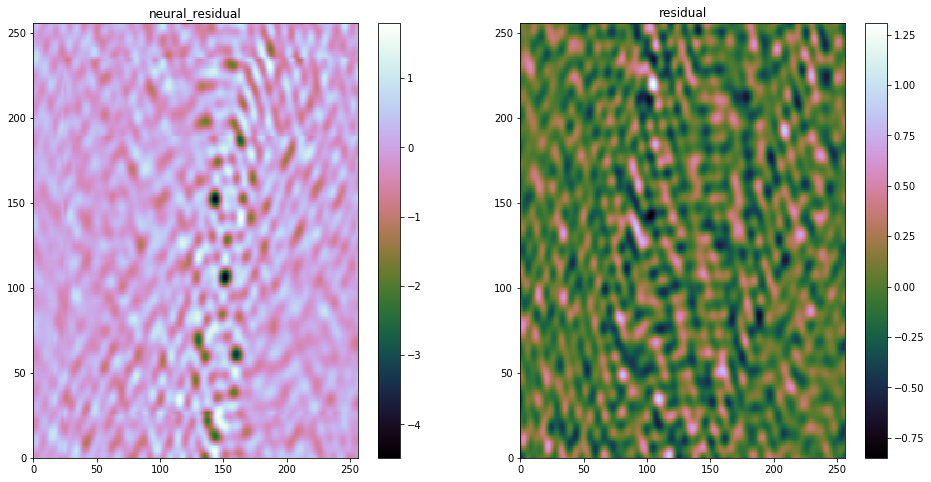

In [73]:
f, (a1, a2) = plt.subplots(1, 2, figsize=(16,8))
render(a1, neural_residual, 'neural_residual')
render(a2, residual, 'residual')